In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_boston

boston_data = load_boston()
data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
print(boston_data.DESCR)
target = pd.DataFrame(boston_data.target)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data.describe()

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

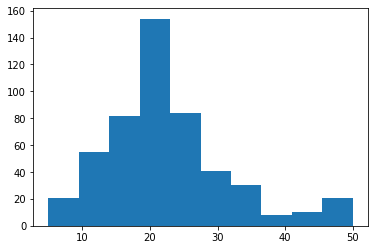

In [10]:
plt.hist(boston_data.target)

In [13]:
range_features = pd.DataFrame({
    feature_name: (data[feature_name].min() - 1, data[feature_name].max() + 1)
    for feature_name in data.columns
})
print(range_features)

       CRIM     ZN  INDUS  CHAS    NOX     RM    AGE      DIS   RAD    TAX  \
0  -0.99368   -1.0  -0.54  -1.0 -0.615  2.561    1.9   0.1296   0.0  186.0   
1  89.97620  101.0  28.74   2.0  1.871  9.780  101.0  13.1265  25.0  712.0   

   PTRATIO       B  LSTAT  
0     11.6   -0.68   0.73  
1     23.0  397.90  38.97  


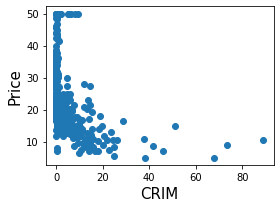

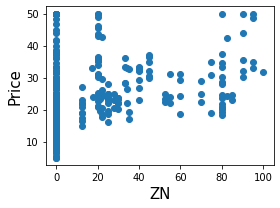

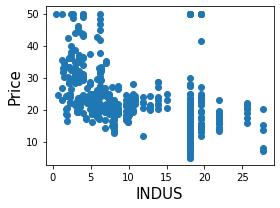

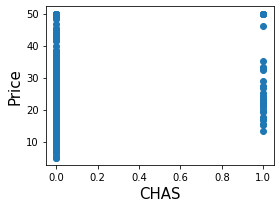

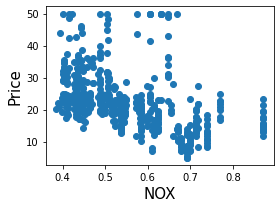

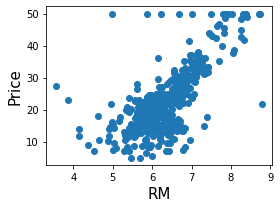

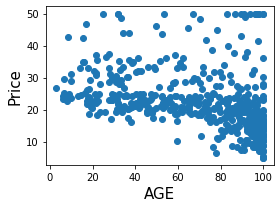

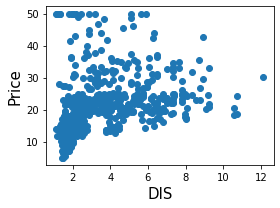

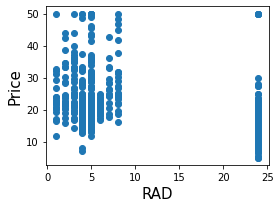

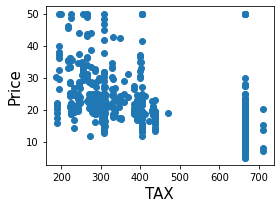

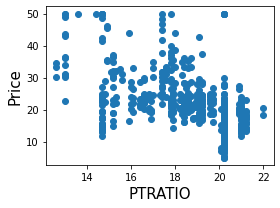

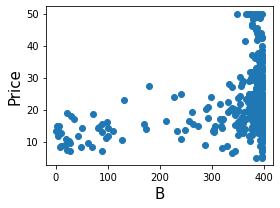

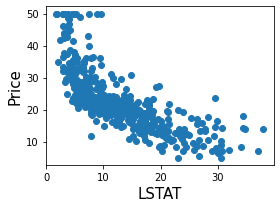

In [14]:
for index, feature_name in enumerate(boston_data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_data.data[:, index], boston_data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

Separamos datos de prueba y de entrenamiento

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target)

Procedemos a crear el modelo

In [18]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

Vamos a calcular el error

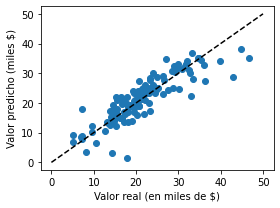

In [19]:
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(4,3))
plt.scatter(expected,predicted)
plt.plot([0,50],[0,50], '--k')
plt.xlabel("Valor real (en miles de $)")
plt.ylabel("Valor predicho (miles $)")
plt.tight_layout()

In [21]:
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))
print(f"La precision del modelo vs el set de prueba es {clf.score(X_test, y_test)}")

RMS: 4.127503148765804 
La precision del modelo vs el set de prueba es 0.7268955570526339
